# First ML homework
## Task 1
### Subtask 1

In [1]:
import sys
import numpy as np
import pandas as pd
print("Python version is:  " + sys.version)
print("Numpy version is:  " + np.__version__)
print("Pandas version is:  " + pd.__version__)

Python version is:  3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]
Numpy version is:  1.26.0
Pandas version is:  2.1.1


### Subtask 2

In [2]:
class DAO:
    def __init__(self, ifname, iftype, ofname, oftype):
        self.ifname = ifname
        self.iftype = iftype
        self.ofname = ofname
        self.oftype = oftype
    def load(self):
        try:
            if(self.iftype == 'csv'):
                data = np.genfromtxt(self.ifname, delimiter=',', dtype=str) # assuming that the  delimiter is ',' and the type  is string
                return data
            elif(self.iftype == 'txt'):
                data = np.loadtxt(self.ifname, dtype='str') #this is of course by assuming the type of data is string
                return data
            else:
                raise ValueError("This type of document is not supported.")
        except ValueError as ve:
            raise ValueError("A value error occured. " + str(ve))
        except Exception as e:
            raise(f"An error occured while trying to handle the document: {str(e)}")
    def store(self, data):
        if(isinstance(data, str)):
            data = np.array([data])
        try: 
            np.savetxt(self.ofname, data, fmt="%s", delimiter=',')
        except Exception as e:
            raise(f"An error occured while trying to handle the document: {str(e)}")
                

### Subtask 3

In [3]:
import abc
from abc import ABC, abstractmethod

class SubTaskABC(ABC):

    @abstractmethod
    def process(self):
        pass


class SubTask13(SubTaskABC):
    def __init__(self, dao):
        self.dao = dao

    def reverse(self, s):
        odd = []
        even = []
        for i in range(len(s)):
            if(i % 2 == 0):
                even.append(s[i])
            else:
                odd.append(s[i])
        return ''.join(odd) + ''.join(even[::-1])
    
    def process(self):
        #load from input13
        
        data = self.dao.load()
        
        data_list = data.tolist()
        #if there is only one string then I revert it or I iterate throught all and revert them
        isList = False
        try:
            if(type(data_list) == list):
                isList = True
                for line in data_list:
                    for index, el in enumerate(line):
                        line[index] = self.reverse(el)
            elif(type(data_list) == str):
                data_list = self.reverse(data_list)
        except Exception as e:
            raise Exception("Couldn't revert the  string(s) because of the following error: " + str(e))
            
        #changing the list back to  numpy array
        if(isList):
            data_np = np.array(data_list)
        else:
            data_np = np.array([data_list])
        self.dao.store(data_np)

### Subtask 4

In [4]:
import unittest

class TestDAO(unittest.TestCase):
    
    def test_store_(self):
        dao = DAO('./input13.txt', 'txt', './output13.txt', 'txt')
        dao.store("text_test")
        with open('output13.txt', 'r') as f:
            self.assertEqual(f.read(), 'text_test\n')     
            
    def test_load(self):
        dao = DAO('./input13.txt', 'txt', './output13.txt', 'txt')
        self.assertEqual(dao.load(), 'abcdefghi')
        
    def test_doctype(self):
        dao = DAO('./input13.txt', 'ss', './output13.txt', 'txt')
        with self.assertRaises(ValueError):
            dao.load()

class TestSubtask3(unittest.TestCase):

    def test_process(self):
        dao = DAO('./input13.txt', 'txt', './output13.txt', 'txt')
        st = SubTask13(dao)
        st.process()
        with open('output13.txt', 'r') as f:
            self.assertEqual(f.read(), 'bdfhigeca\n')

    def test_doctype(self):
        dao = DAO('./input133.txt', 'xsf', './output133.txt', 'tssxt')
        st = SubTask13(dao)
        with self.assertRaises(ValueError):
            st.process()

    def test_2dprocess(self):
        dao = DAO('./input_list.txt', 'txt', './output13.txt', 'txt')
        st = SubTask13(dao)
        st.process()
        with open('output13.txt', 'r') as f:
            self.assertEqual(f.read().split(), ['bdfhigeca,khfsadgjl', 'xvnkmbcz,knihubjom'])
        
    

test1 = unittest.TestLoader().loadTestsFromTestCase(TestDAO)
test2 = unittest.TestLoader().loadTestsFromTestCase(TestSubtask3)
unittest.TextTestRunner().run(unittest.TestSuite([test1, test2]))

......
----------------------------------------------------------------------
Ran 6 tests in 0.014s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Task 2
### Subtask 1

In [5]:
import time
class SubTask21(SubTaskABC):
    def __init__(self, dao):
        self.dao = dao

    def matrix_conversion(self, df):
        #I transform a sequence of vectors with 3 coordinates to 3x3 matrices
        matrix = []
        start_index = 0
        tmp = []
        df = df.tolist()
        for line in range(len(df)):
            tmp.append(df[line])
            if(start_index == 2):
                start_index = 0
                matrix.append(tmp)
                tmp = []
            else:
                start_index += 1
        #Now I have a matrix 3d array, but I have to change its values to integers
        matrix = [[[int(value) for value in inner_list] for inner_list in outer_list]for outer_list in matrix]
        return matrix

    def mm_myself(self, matrix1, matrix2):
        #First I create a 3x3 matrix to put the calculated results to
        result = [[0 for row in range(len(matrix2[0]))] for col in range(len(matrix1))]
        for i in range(len(matrix1)):
            for j in range(len(matrix2[0])):
                for k in range(len(matrix1[0])):
                    result[i][j] += matrix1[i][k] * matrix2[k][j]
        return result
    
    def mm_numpy(self, matrix1, matrix2):
        m1 = np.array(matrix1)
        m2 = np.array(matrix2)
        result = np.matmul(m1, m2)
        return result
    
    def slow_multiplication(self, matrices):
        tmp = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
        if(len(np.array(matrices)) == 3):
            for matrix in matrices:
                tmp = self.mm_myself(tmp, matrix)
        else:
            tmp = self.mm_myself(tmp, matrices)
        return tmp
    
    def fast_multiplication(self, matrices):
        tmp = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
        if(len(np.array(matrices)) == 3):
            for matrix in matrices:
                tmp = self.mm_numpy(tmp, matrix)
        else:
            tmp = self.mm_numpy(tmp, matrices)
        return tmp

    def process(self):
        matrices = self.matrix_conversion(self.dao.load())
        result = self.slow_multiplication(matrices)

        #calculate the time for the numpy algorithm
        start_time_fast = time.perf_counter()
        
        for i in range(100000):
            f = self.fast_multiplication(matrices)
        
        end_time_fast = time.perf_counter()
        elapsed_time_fast = end_time_fast - start_time_fast
        
        #calculate the time for my algorithm
        start_time_slow = time.perf_counter()
        
        for i in range(100000):
            s = self.slow_multiplication(matrices)
        
        end_time_slow = time.perf_counter()
        elapsed_time_slow = end_time_slow - start_time_slow

        speedup = elapsed_time_fast/elapsed_time_slow
        
        print("Time for the fast algorithm to finish: " + str(elapsed_time_fast/100000))
        print("Time for the slow algorithm to finish: " + str(elapsed_time_slow/100000))
        print("The speedup of the algorithm: " + str(speedup))
        #implement writing the speedup to the file
        s = np.concatenate((result, [[str(elapsed_time_fast/100000), str(elapsed_time_slow/100000), str(speedup)]]))
        self.dao.store(s)
        
        

## Subtask 2

In [6]:
class SubTask22(SubTaskABC):
    def __init__(self, dao):
        self.dao = dao
    def pandas_stats(self, column):
        mean = np.mean(column)
        median = np.median(column)
        standard = np.std(column)
        q25 = np.quantile(column, 0.25)
        q50 = np.quantile(column, 0.50)
        q75 = np.quantile(column, 0.75)
        min_value = np.min(column)
        max_value = np.max(column)
        return  [mean, median, standard, q25, q50, q75, min_value, max_value]

    def my_stats(self, column):
        #mean
        mean = sum(column) / len(column)
        #median
        n = len(column) 
        column.sort()
        if n % 2 == 0: 
            median1 = column[n//2] 
            median2 = column[n//2 - 1] 
            median = (median1 + median2)/2
        else: 
            median = column[n//2] 
        #standard deviation
        variance = sum((xi - mean) ** 2 for xi in column) / len(column)
        standard = variance ** 0.5
        #quantiles
        q25 = column[int(0.25 * len(column))]
        q50 = column[int(0.50 * len(column))]
        q75 = column[int(0.75 * len(column))]
        min_value = min(column)
        max_value = max(column)
        return [mean, median, standard, q25, q50, q75, min_value, max_value]
    

    def process(self):
        df = self.dao.load()
        df = [[int(element) for element in row] for row in df]
        p_stats = [self.pandas_stats(column) for column in df]
        m_stats = [self.my_stats(column) for column in df]
        p_stats.extend(m_stats)
        result = np.array(p_stats)
        #calculate the time for the numpy algorithm
        start_time_fast = time.perf_counter()
        
        for i in range(100000):
            p_stats = [self.pandas_stats(column) for column in df]
        
        end_time_fast = time.perf_counter()
        elapsed_time_fast = end_time_fast - start_time_fast
        
        #calculate the time for my algorithm
        start_time_slow = time.perf_counter()
        
        for i in range(100000):
             p_stats = [self.my_stats(column) for column in df]
        
        end_time_slow = time.perf_counter()
        elapsed_time_slow = end_time_slow - start_time_slow

        speedup = elapsed_time_fast/elapsed_time_slow
        
        print("Time for the fast algorithm to finish: " + str(elapsed_time_fast/100000))
        print("Time for the slow algorithm to finish: " + str(elapsed_time_slow/100000))
        print("The speedup of the algorithm: " + str(speedup))
        self.dao.store(result)
        

## Task 3

### Subtask 1

In [7]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [8]:
from sklearn.model_selection import train_test_split
X = california['data']
y = california['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

print("Original size of the X: " + str(X.shape))
print("Original size of the y: " + str(y.shape))
print("")
print("Size of the training X set: " + str(X_train.shape))
print("Size of the testing X set: " + str(X_test.shape))
print("Size of the training y set: " + str(y_train.shape))
print("Size of the testing y set: " + str(y_test.shape))

Original size of the X: (20640, 8)
Original size of the y: (20640,)

Size of the training X set: (14448, 8)
Size of the testing X set: (6192, 8)
Size of the training y set: (14448,)
Size of the testing y set: (6192,)


### Subtask 2

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regr = LinearRegression()
 
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE that was calculated using sklearn's Linear Regressor model is: " + str(mse))

MSE that was calculated using sklearn's Linear Regressor model is: 0.5305677824766754


### Subtask 3

In [10]:
part_1 = np.linalg.inv(np.matmul(np.transpose(X_train), X_train))
part_2 = np.matmul(part_1, np.transpose(X_train))
optimal_w = np.matmul(part_2, y_train)
print("The optimal vector I got is this: " + str(optimal_w))

The optimal vector I got is this: [ 5.19126645e-01  1.59077753e-02 -1.91238789e-01  9.69525468e-01
  1.14227799e-05 -4.22684919e-03 -6.17086173e-02 -1.48558358e-02]


In [11]:
y_train_pred = np.dot(X_train, optimal_w)
mse = np.mean((y_train - y_train_pred)**2)
print("MSE that was calculated using closed form solution for optimal weight is: " + str(mse))

MSE that was calculated using closed form solution for optimal weight is: 0.6054030599879396


### Subtask 4

In [12]:
w = np.zeros(X.shape[1])
lr = 0.0000001

def gradient(w, X, y):
    return 2/len(y) * np.dot(X_train.T, np.dot(X_train, w) - y_train)

def gd(w, X, y, lr):
    mses = []
    for k in range(100):
        for i in range(1000):
            grad = gradient(w, X, y)
            w = w - lr * grad
        mse = np.mean((y - np.dot(X, w))**2)
        mses.append(mse)
    return mses, mses[len(mses) - 1]

total_mses, total_mse = gd(np.zeros(X.shape[1]), X, y, lr)
training_mses, training_mse = gd(np.zeros(X_train.shape[1]), X_train, y_train, lr)
test_mses, test_mse = gd(np.zeros(X_test.shape[1]), X_test, y_test, lr)

In [13]:
print("MSE achieved with 100 iterations for the training dataset is: " + str(training_mse))
print("MSE achieved with 100 iterations for the test dataset is: " + str(test_mse))

MSE achieved with 100 iterations for the training dataset is: 1.2219512048154593
MSE achieved with 100 iterations for the test dataset is: 1.0895056337322453


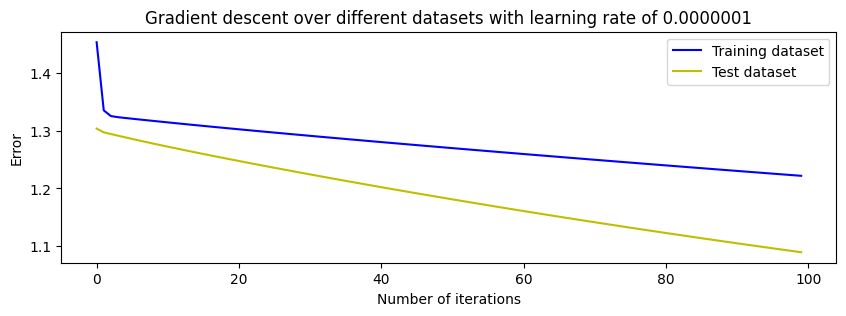

In [14]:
from matplotlib import pyplot as plt


ks = [i for i in range(100)]
plt.figure(figsize=(10,3))
plt.plot(ks, training_mses, 'b-', label="Training dataset")  
plt.plot(ks, test_mses, 'y-', label="Test dataset") 
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Gradient descent over different datasets with learning rate of 0.0000001')
plt.legend(loc="upper right")

### Subtask 5 

In [15]:
def adaptive_gd(w, X, y, lr):
    mses = []
    means = []
    last_means = []
    for k in range(100):
        means = []
        for i in range(1000):
            if(i == 0 and k == 0):
                means.append(np.mean((y - np.dot(X, w))**2))
            elif(i == 0 and k != 0):
                if(last_means[0] > np.mean((y - np.dot(X, w))**2) ):
                    lr *= 1.1
                else:
                    lr *= 0.6
            else:
                if(means[(i-1)] > np.mean((y - np.dot(X, w))**2) ):
                    lr *= 1.1
                else:
                    lr *= 0.6
            means.append(np.mean((y - np.dot(X, w))**2))
            grad = gradient(w, X, y)
            w = w - lr * grad
        mse = np.mean((y - np.dot(X, w))**2)
        last_means.append(mse)
        mses.append(mse)
    return mses, mses[len(mses) - 1]

a_training_mses, a_training_mse = adaptive_gd(np.zeros(X_train.shape[1]), X_train, y_train, lr)
a_test_mses, a_test_mse = adaptive_gd(np.zeros(X_test.shape[1]), X_test, y_test, lr)

In [16]:
print("MSE achieved with 100 iterations for the training dataset is: " + str(a_training_mse))
print("MSE achieved with 100 iterations for the test dataset is: " + str(a_test_mse))

MSE achieved with 100 iterations for the training dataset is: 1.0542869677912927
MSE achieved with 100 iterations for the test dataset is: 0.9563625736864027


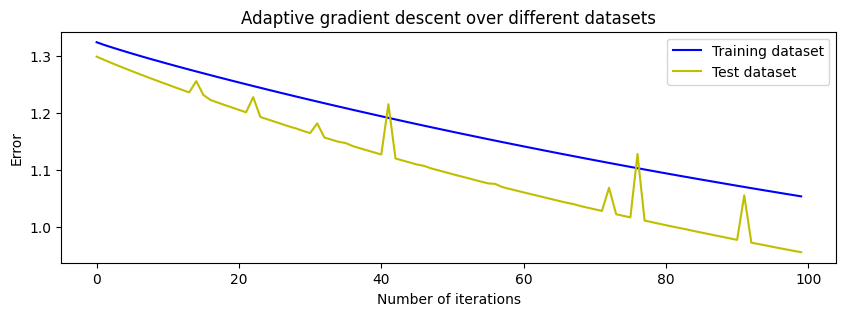

In [17]:
ks = [i for i in range(100)]
plt.figure(figsize=(10,3))
plt.plot(ks, a_training_mses, 'b-', label="Training dataset")  
plt.plot(ks, a_test_mses, 'y-', label="Test dataset") 
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Adaptive gradient descent over different datasets')
plt.legend(loc="upper right")

### Subtask 6

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
#X_train_scaled = scaler.fit_transform(X_train)
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)

mms_train_mses, mms_train_mse = gd(np.zeros(X_train_scaled.shape[1]), X_train_scaled, y_train, lr)
mms_test_mses, mms_test_mse =gd(np.zeros(X_test.shape[1]), X_test_scaled, y_test, lr)

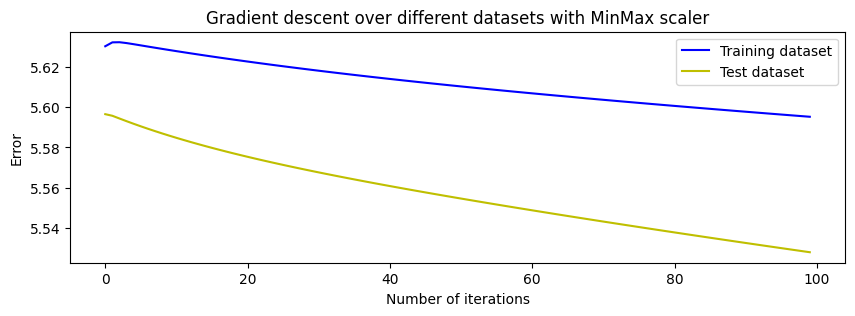

In [19]:
ks = [i for i in range(100)]
plt.figure(figsize=(10,3))
plt.plot(ks, mms_train_mses, 'b-', label="Training dataset")  
plt.plot(ks, mms_test_mses, 'y-', label="Test dataset") 
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Gradient descent over different datasets with MinMax scaler')
plt.legend(loc="upper right")

In [20]:
mms_a_train_mses, mms_a_train_mse = adaptive_gd(np.zeros(X_train_scaled.shape[1]), X_train_scaled, y_train, 0.00001)
mms_a_test_mses, mms_a_test_mse = adaptive_gd(np.zeros(X_test.shape[1]), X_test_scaled, y_test, 0.00001)

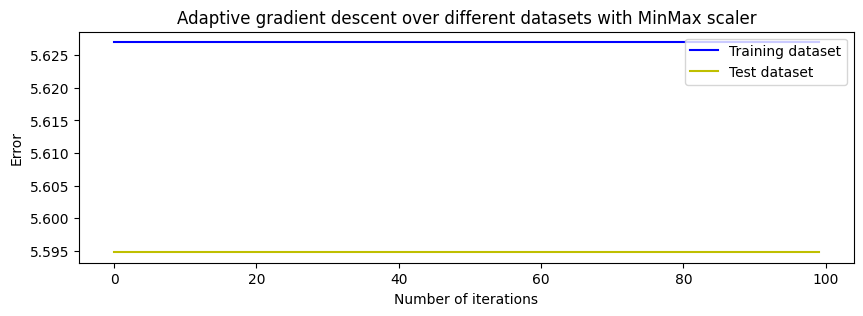

In [21]:
ks = [i for i in range(100)]
plt.figure(figsize=(10,3))
plt.plot(ks, mms_a_train_mses, 'b-', label="Training dataset")  
plt.plot(ks, mms_a_test_mses, 'y-', label="Test dataset") 
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Adaptive gradient descent over different datasets with MinMax scaler')
plt.legend(loc="upper right")

### Subtask 7

First implementation

In [22]:
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

degrees = [2, 3, 4]
train_rmses = []
test_rmses = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    poly_features = poly.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    train_predicted = reg_model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_test, train_predicted))
    
    test_pred = reg_model.predict(X_train)
    test_rmse = np.sqrt(mean_squared_error(y_train, test_pred))
    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)
    print(f'Degree {degree} Polynomial - Mean Squared Error for this degree: {train_rmse}')
    print(f'Degree {degree} Polynomial - Mean Squared Error for this degree: {test_rmse}')


Degree 2 Polynomial - Mean Squared Error for this degree: 0.6745163730301048
Degree 2 Polynomial - Mean Squared Error for this degree: 0.6508463314463686
Degree 3 Polynomial - Mean Squared Error for this degree: 4.394988921779183
Degree 3 Polynomial - Mean Squared Error for this degree: 0.5860754537391314
Degree 4 Polynomial - Mean Squared Error for this degree: 117.52628282568787
Degree 4 Polynomial - Mean Squared Error for this degree: 0.5307584954511115


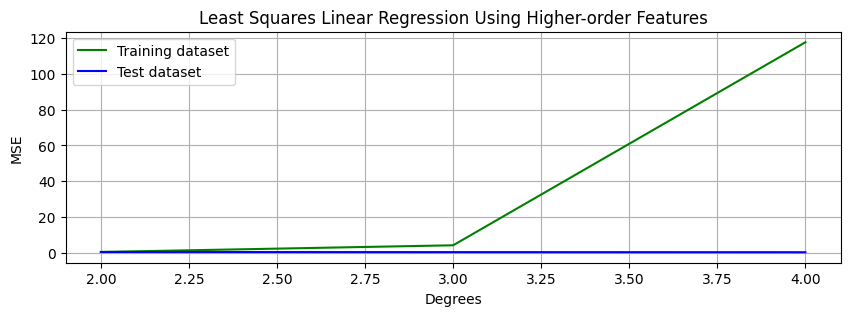

In [23]:
plt.figure(figsize=(10,3))
plt.plot(degrees, train_rmses, 'g-', label='Training dataset')
plt.plot(degrees, test_rmses, 'b-', label='Test dataset')
plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.title('Least Squares Linear Regression Using Higher-order Features')
plt.grid()
plt.legend(loc="upper left")